## Exercise Classification

 - Import aps_failure_training_set.csv file and aps_failure_test_set.csv

 - Using training dataset, train a NN to predict the class. It indicates if there is failure in the trucks.

 - When using common accuracy metrics we know if our model is good, but is it good enough? We will define a new specific metric for this problem: **Total cost**. For each truck we say it fails, the company sends a mechanic to review the truck, which supposes a cost of 10. On the other hand, if we say there is not failure when they actually are, the truck breakdowns, which supposes a cost of 500. In summary, False positives cost 10, and False negatives cost 500.

 - Train several NN and keep the one with less total costs. Your goal is to achieve a Total cost lower than 1

 - The evaluation phase (Total cost calculation) must be done using the test dataset (aps_failure_test_set.csv)

 - Below some pieces of code that can help you complete the exercise, specially the last one, where the definition of the Total cost is

In [8]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
data_test = pd.read_csv("drive/MyDrive/Ironhack/Data/aps_failure_test_set.csv")
data_train = pd.read_csv("drive/MyDrive/Ironhack/Data/aps_failure_training_set.csv")

In [81]:
data_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [82]:
import plotly
import plotly.graph_objs as go

In [83]:
# Código para pintar gráfico con el porcentaje de valores perdidos por variable
NULL_RATIO_TRHESHOLD = 0 # Set the null ratio threshold required


null_ratios = (data_train.isnull().sum() / data_train.shape[0])
null_ratios_over_threshold = null_ratios[null_ratios > NULL_RATIO_TRHESHOLD].sort_values(ascending=False)

data_go = [
    go.Bar(
        x=null_ratios_over_threshold.index,
        y=null_ratios_over_threshold
    )
]

fig = go.Figure(data=data_go, layout={
    "title": "Null Ratio for Features with Null Ratio Exceeding {}".format(NULL_RATIO_TRHESHOLD)
})

plotly.offline.iplot(fig)

In [84]:
null_ratios_over_threshold = null_ratios[null_ratios > NULL_RATIO_TRHESHOLD].sort_values(ascending=False)
nan_columns = list(null_ratios_over_threshold[null_ratios_over_threshold>0.1].index)

In [85]:
data_test.drop(nan_columns, axis = 1, inplace = True)
for d in data_test.columns:
        if data_test[d].isna().sum()!=0:
            data_test[d] = data_test[d].fillna(data_test[d].mean())

data_train.drop(nan_columns, axis = 1, inplace = True)
for d in data_train.columns:
        if data_train[d].isna().sum()!=0:
            data_train[d] = data_train[d].fillna(data_train[d].mean())

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_val, y_train, y_val = train_test_split(data_train.drop('class', axis=1),
                                                    data_train['class'], train_size = 0.8, random_state = 0)
X_train.head(3)

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
5778,60660,266.0,0.0,0.0,0.0,0.0,0.0,0.0,3236.0,499876.0,...,273744.0,145088.0,311782.0,371428.0,371870.0,381522.0,700624.0,9062.0,0.0,0.0
5287,3412,86.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,18492.0,...,9260.0,4462.0,11122.0,9132.0,11944.0,15364.0,70760.0,1712.0,0.0,0.0
57167,29664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612.0,316230.0,...,409912.0,222004.0,393608.0,182968.0,97552.0,45586.0,30968.0,268.0,0.0,0.0


In [88]:
y_train.head(3)

5778     neg
5287     neg
57167    neg
Name: class, dtype: object

In [89]:
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # for model evaluation metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [91]:
# Para equilibrar la variable respuesta
ros = RandomOverSampler(random_state=42)
X_train, y_train= ros.fit_resample(X_train, y_train)

In [114]:
X_test = data_test.drop('class', axis=1)
y_test = data_test['class']

In [92]:
scaler = StandardScaler()
sc = scaler.fit(X_train)

train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(train_sc)
X_train_sc.columns = X_train.columns

test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(test_sc)
X_test_sc.columns = X_test.columns

print(X_train_sc.shape)
print(X_test_sc.shape)

(94368, 142)
(12000, 142)


In [93]:
mapeo = {"neg": 0, "pos": 1}

# Utilizar la función de map para aplicar el mapeo a la columna
y_train=y_train.map(mapeo)
y_test=y_test.map(mapeo)
y_val=y_val.map(mapeo)

In [94]:
y_val

3048     0
19563    0
58303    0
8870     0
40228    0
        ..
47049    0
31629    0
50430    0
21574    0
10617    0
Name: class, Length: 12000, dtype: int64

In [97]:
val_sc = sc.transform(X_val)
X_val_sc = pd.DataFrame(val_sc)
X_val_sc.columns = X_val.columns

In [98]:
MLP_Clas = Sequential()
# MLP_Clas.add(BatchNormalization())
MLP_Clas.add(Dense(12, input_shape=(142,), activation='relu'))


MLP_Clas.add(Dense(8, activation='relu'))


MLP_Clas.add(Dense(1, activation='sigmoid'))

# Learning rate and optimizer
learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)

# compile the keras model
MLP_Clas.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', Recall()]) # metrics=['accuracy']

history_clas = MLP_Clas.fit(X_train_sc, y_train,validation_data=(X_val_sc, y_val), epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy_tr, recall_tr = MLP_Clas.evaluate(X_train_sc, y_train)
_, accuracy_ts, recall_ts = MLP_Clas.evaluate(X_test_sc, y_test)
print('Accuracy train: %.2f; Recall train: %.2f' % (accuracy_tr*100, recall_tr*100))
print('Accuracy test: %.2f; Recall test: %.2f' % (accuracy_ts*100, recall_ts*100))

Epoch 1/10
9437/9437 [==============================] - 38s 4ms/step - loss: 0.1243 - accuracy: 0.9605 - recall_8: 0.9577 - val_loss: 0.0900 - val_accuracy: 0.9688 - val_recall_8: 0.9185
Epoch 2/10
9437/9437 [==============================] - 38s 4ms/step - loss: 0.0899 - accuracy: 0.9738 - recall_8: 0.9767 - val_loss: 0.0968 - val_accuracy: 0.9697 - val_recall_8: 0.8859
Epoch 3/10
9437/9437 [==============================] - 41s 4ms/step - loss: 0.0743 - accuracy: 0.9802 - recall_8: 0.9825 - val_loss: 0.0978 - val_accuracy: 0.9727 - val_recall_8: 0.8750
Epoch 4/10
9437/9437 [==============================] - 44s 5ms/step - loss: 0.0670 - accuracy: 0.9835 - recall_8: 0.9848 - val_loss: 0.0743 - val_accuracy: 0.9829 - val_recall_8: 0.8261
Epoch 5/10
9437/9437 [==============================] - 38s 4ms/step - loss: 0.0592 - accuracy: 0.9851 - recall_8: 0.9855 - val_loss: 0.0750 - val_accuracy: 0.9822 - val_recall_8: 0.8152
Epoch 6/10
9437/9437 [==============================] - 38s 4ms/s

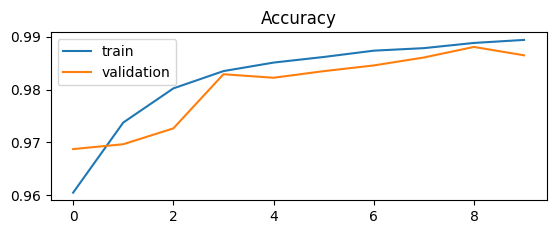

In [99]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_clas.history['accuracy'], label='train')
pyplot.plot(history_clas.history['val_accuracy'], label='validation')
pyplot.legend()

## Exercise Regression

 - Import medical_score_train.csv and medical_score_test.csv

 - Using training dataset, train a NN for medical score prediction

 - Your goal is to achieve a MAE lower than 8

In [120]:
data2_test = pd.read_csv("drive/MyDrive/Ironhack/Data/medical_score_test.csv",delimiter=",")
data2_train = pd.read_csv("drive/MyDrive/Ironhack/Data/medical_score_train.csv",delimiter=";")

In [121]:
data2_train

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,403,34.130,0.00243,0.000018,0.00108,0.00124,0.00323,0.01147,0.105,0.00625,...,-0.824511,-1.217875,-0.432389,-1.455320,-0.280675,0.681113,0.375320,0.764563,-0.237859,-0.282198
1,1477,19.000,0.00280,0.000021,0.00087,0.00128,0.00260,0.01575,0.137,0.00812,...,0.080466,-0.812559,1.512731,0.070331,2.368754,-0.256309,1.315997,0.093631,-0.389538,1.396095
2,5342,43.104,0.00412,0.000028,0.00162,0.00213,0.00487,0.02644,0.242,0.01150,...,-0.060555,-0.027766,-0.123652,0.820478,1.054439,1.922146,-1.262435,2.017997,0.687229,-0.935456
3,3812,38.814,0.00781,0.000043,0.00451,0.00399,0.01353,0.02975,0.261,0.01650,...,-0.153332,-1.298289,1.410486,1.950012,0.613255,0.492419,0.124454,0.891332,0.401179,0.383195
4,138,41.034,0.00488,0.000026,0.00265,0.00251,0.00794,0.04983,0.448,0.02688,...,-0.985639,-0.469064,-2.579920,0.173884,-0.330941,0.089597,0.617369,-0.183967,0.408726,1.607871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,1835,34.945,0.00396,0.000021,0.00202,0.00194,0.00606,0.01801,0.168,0.00931,...,-0.059465,-2.339619,0.191836,-0.550948,-2.254442,-0.687316,-1.689359,-0.390774,-0.639883,0.301319
4137,5803,29.835,0.00829,0.000069,0.00360,0.00260,0.01079,0.04467,0.406,0.02295,...,0.272747,-0.929431,-0.271502,-1.885880,-0.799171,0.974449,1.539181,-0.815626,-0.937127,-0.190968
4138,3390,46.674,0.00292,0.000030,0.00136,0.00154,0.00408,0.02045,0.178,0.00968,...,0.833592,-0.775009,-0.032361,-0.113071,-0.475901,-0.573549,-0.061487,0.577916,0.750130,0.398217
4139,2851,38.569,0.00360,0.000030,0.00188,0.00213,0.00564,0.04781,0.423,0.02545,...,0.007326,0.901621,-1.354483,-0.110579,-0.551393,-0.167491,0.246069,-1.410998,0.952076,2.281595


In [122]:
data2_test

,Id,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,1178,0.00465,0.000021,0.00253,0.00254,0.00760,0.01743,0.184,0.00858,0.00974,...,-0.622937,-0.345015,-0.172781,1.632996,-0.819828,1.026481,-1.395062,1.065962,-1.854161,0.424490
1,4954,0.03805,0.000184,0.01723,0.02981,0.05170,0.15431,1.450,0.07356,0.13302,...,-0.563150,-0.403509,-1.149322,0.152665,-0.053284,-0.287827,-0.119217,0.612956,-0.731272,-0.608852
2,1269,0.01094,0.000123,0.00429,0.00502,0.01288,0.04010,0.368,0.01749,0.02065,...,0.077701,-0.061947,0.581850,-0.059723,0.226147,1.613662,0.114775,0.170831,0.159562,-0.571270
3,5269,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,...,-0.106470,0.923359,-1.290854,0.959982,0.232197,-0.669471,-0.049756,-0.110285,0.437221,-1.399420
4,143,0.00688,0.000041,0.00390,0.00307,0.01171,0.04896,0.419,0.03117,0.02345,...,-0.216855,0.516351,1.194716,-0.451112,-0.063620,-1.356854,-0.093523,0.219119,0.943376,0.146435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,32,0.00686,0.000038,0.00369,0.00358,0.01107,0.02752,0.241,0.01358,0.01621,...,1.185815,-0.449207,0.342048,-1.193107,-0.156363,0.856098,0.432268,-0.727760,-0.780916,-1.433153
1730,2376,0.00473,0.000020,0.00266,0.00249,0.00798,0.01705,0.164,0.00862,0.00957,...,0.284910,-0.716390,-1.138497,0.415571,0.351105,0.404908,0.796156,-0.957026,0.878717,-1.299467
1731,1831,0.00517,0.000025,0.00229,0.00182,0.00687,0.01938,0.188,0.00975,0.01084,...,-2.100877,-2.046236,-0.418604,0.650658,0.359772,-0.430292,0.777870,0.116467,-1.011891,0.283455
1732,2757,0.00793,0.000064,0.00431,0.00432,0.01292,0.02794,0.232,0.01546,0.01709,...,-1.215980,-2.003287,0.398939,-2.119441,0.229443,-0.017400,0.666651,1.168363,2.053822,1.140155


falta la columna score, usare parte del train como test

In [125]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(data2_train.drop('score', axis=1),
                                                    data2_train['score'], train_size = 0.8, random_state = 0)
X2_train.head(3)

,Id,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
50,1750,0.00354,0.000019,0.00173,0.00201,0.00519,0.01695,0.159,0.00870,0.00984,...,-0.342525,0.131178,0.441993,0.705513,-0.585027,-0.451195,0.333431,1.311031,-0.946694,-1.250781
64,5312,0.00523,0.000038,0.00283,0.00264,0.00849,0.02347,0.218,0.00985,0.00950,...,-0.336604,-0.812599,-0.332020,0.803171,-0.437687,-0.723893,-1.030945,-1.131642,0.225541,-0.777905
1523,2044,0.00363,0.000024,0.00129,0.00140,0.00387,0.02675,0.225,0.01269,0.01653,...,-0.528140,1.351238,-1.205589,-0.789281,0.709038,0.798746,-0.291179,0.370667,2.485730,-0.947459


In [126]:
scaler = StandardScaler()
sc = scaler.fit(X2_train)

train_sc = sc.transform(X2_train)
X2_train_sc = pd.DataFrame(train_sc)
X2_train_sc.columns = X2_train.columns

test_sc = sc.transform(X2_test)
X2_test_sc = pd.DataFrame(test_sc)
X2_test_sc.columns = X2_test.columns

print(X2_train_sc.shape)
print(X2_test_sc.shape)

(3312, 28)
(829, 28)


In [127]:
MLP_Reg = Sequential()
MLP_Reg.add(Dense(12, input_shape=(28,), activation='ReLU'))

MLP_Reg.add(Dense(8, activation='ReLU'))
# MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(8, activation='ReLU'))
# MLP_Reg.add(Dropout(0.2))

MLP_Reg.add(Dense(1, activation='ReLU'))

# Learning rate and optimizer
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# compile the keras model
MLP_Reg.compile(loss='MeanAbsoluteError', optimizer='Adam', metrics=['MeanAbsoluteError','MeanAbsolutePercentageError'])
# fit the keras model on the dataset
# model.fit(X, y, epochs=15, batch_size=10)
history_Reg = MLP_Reg.fit(X2_train_sc, y2_train, validation_data=(X2_test_sc, y2_test), epochs=70, batch_size=10)
# evaluate the keras model
_, mae_tr, mape_tr = MLP_Reg.evaluate(X2_train_sc, y2_train)
_, mae_ts, mape_ts = MLP_Reg.evaluate(X2_test_sc, y2_test)
print('MSE train: %.2f; MAPE train: %.2f' % (mae_tr, mape_tr))
print('MSE test: %.2f; MAPE test: %.2f' % (mae_ts, mape_ts))

Epoch 1/70
332/332 [==============================] - 6s 5ms/step - loss: 20.6282 - mean_absolute_error: 20.6282 - mean_absolute_percentage_error: 71.9856 - val_loss: 11.6639 - val_mean_absolute_error: 11.6639 - val_mean_absolute_percentage_error: 46.0301
Epoch 2/70
332/332 [==============================] - 1s 4ms/step - loss: 9.9128 - mean_absolute_error: 9.9128 - mean_absolute_percentage_error: 39.5864 - val_loss: 9.0527 - val_mean_absolute_error: 9.0527 - val_mean_absolute_percentage_error: 37.4606
Epoch 3/70
332/332 [==============================] - 1s 4ms/step - loss: 8.5717 - mean_absolute_error: 8.5717 - mean_absolute_percentage_error: 35.2175 - val_loss: 8.5757 - val_mean_absolute_error: 8.5757 - val_mean_absolute_percentage_error: 35.7336
Epoch 4/70
332/332 [==============================] - 1s 4ms/step - loss: 8.2610 - mean_absolute_error: 8.2610 - mean_absolute_percentage_error: 34.3147 - val_loss: 8.4427 - val_mean_absolute_error: 8.4427 - val_mean_absolute_percentage_err

In [128]:
pred = MLP_Reg.predict(X2_test_sc, verbose = 0)

In [129]:
import numpy as np

In [130]:
print("MAE: ", metrics.mean_absolute_error(y2_test, pred).round(4))
print("MSE: ", metrics.mean_squared_error(y2_test, pred).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y2_test, pred)).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y2_test, pred).round(4))
# print("R2: ", metrics.r2_score(cars_y_test, car_pred).round(4))

MAE:  5.9522
MSE:  61.2499
RMSE:  7.8262
MAPE:  0.2548
